In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle



In [ ]:
df=pd.read_csv('/content/Depression.csv.csv')
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
df=df.drop(columns=['id','Profession','CGPA','City','Degree','Name'],axis=1)


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Working Professional or Student,0
Academic Pressure,112803
Work Pressure,27918
Study Satisfaction,112803
Job Satisfaction,27910
Sleep Duration,0
Dietary Habits,4
Have you ever had suicidal thoughts ?,0


In [ ]:
df['Academic Pressure']=df['Academic Pressure'].fillna(df['Academic Pressure'].mean())
df['Work Pressure']=df['Work Pressure'].fillna(df['Work Pressure'].mean())
df['Study Satisfaction']=df['Study Satisfaction'].fillna(df['Study Satisfaction'].mean())
df['Job Satisfaction']=df['Job Satisfaction'].fillna(df['Job Satisfaction'].mean())
df['Dietary Habits']=df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0])
df['Financial Stress']=df['Financial Stress'].fillna(df['Financial Stress'].mean())


In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder

# Columns to apply Label Encoding
label_encode_cols = [
    'Gender',
    'Working Professional or Student',
    'Dietary Habits',
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness'
      # target variable
]

# Initialize the encoder
le = LabelEncoder()

# Apply Label Encoding using a loop
for col in label_encode_cols:
    df[col] = le.fit_transform(df[col])



In [ ]:
df.head()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49.0,1,3.142273,5.000000,2.94494,2.000000,More than 8 hours,7,0,1.0,2.0,0,0
1,1,26.0,1,3.142273,4.000000,2.94494,3.000000,Less than 5 hours,20,1,7.0,3.0,0,1
2,1,33.0,0,5.000000,2.998998,2.00000,2.974404,5-6 hours,7,1,3.0,1.0,0,1
3,1,22.0,1,3.142273,5.000000,2.94494,1.000000,Less than 5 hours,15,1,10.0,1.0,1,1
4,0,30.0,1,3.142273,1.000000,2.94494,1.000000,5-6 hours,20,1,9.0,4.0,1,0


In [ ]:
# Simple mapping example
df['Sleep Duration'] = df['Sleep Duration'].map({
    'Less than 4 hours': 1,
    '4-5 hours': 2,
    '5-6 hours': 3,
    '6-7 hours': 4,
    '7-8 hours': 5,
    'More than 8 hours': 6
})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  int64  
 1   Age                                    140700 non-null  float64
 2   Working Professional or Student        140700 non-null  int64  
 3   Academic Pressure                      140700 non-null  float64
 4   Work Pressure                          140700 non-null  float64
 5   Study Satisfaction                     140700 non-null  float64
 6   Job Satisfaction                       140700 non-null  float64
 7   Sleep Duration                         101852 non-null  float64
 8   Dietary Habits                         140700 non-null  int64  
 9   Have you ever had suicidal thoughts ?  140700 non-null  int64  
 10  Work/Study Hours                       140700 non-null  

EDA


In [ ]:
df.shape

(140700, 14)

In [ ]:
df.head()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49.0,1,3.142273,5.000000,2.94494,2.000000,6.0,7,0,1.0,2.0,0,0
1,1,26.0,1,3.142273,4.000000,2.94494,3.000000,NaN,20,1,7.0,3.0,0,1
2,1,33.0,0,5.000000,2.998998,2.00000,2.974404,3.0,7,1,3.0,1.0,0,1
3,1,22.0,1,3.142273,5.000000,2.94494,1.000000,NaN,15,1,10.0,1.0,1,1
4,0,30.0,1,3.142273,1.000000,2.94494,1.000000,3.0,20,1,9.0,4.0,1,0


In [ ]:
#now you saw threre  is missing values in the sleep duaration column we have to handle it
df['Sleep Duration'].isna().sum()

np.int64(38848)

In [ ]:
# now filling
df['Sleep Duration']=df['Sleep Duration'].fillna(df['Sleep Duration'].mean())

In [ ]:
df.head()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49.0,1,3.142273,5.000000,2.94494,2.000000,6.000000,7,0,1.0,2.0,0,0
1,1,26.0,1,3.142273,4.000000,2.94494,3.000000,4.689874,20,1,7.0,3.0,0,1
2,1,33.0,0,5.000000,2.998998,2.00000,2.974404,3.000000,7,1,3.0,1.0,0,1
3,1,22.0,1,3.142273,5.000000,2.94494,1.000000,4.689874,15,1,10.0,1.0,1,1
4,0,30.0,1,3.142273,1.000000,2.94494,1.000000,3.000000,20,1,9.0,4.0,1,0


In [ ]:
df.describe()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000
mean,0.550561,40.388621,0.801699,3.142273,2.998998,2.944940,2.974404,4.689874,14.098280,0.494399,6.252679,2.988983,0.497100,0.181713
std,0.497439,12.384099,0.398722,0.614679,1.258598,0.605658,1.267871,1.037910,5.268936,0.499970,3.853615,1.413613,0.499993,0.385609
min,0.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,29.000000,1.000000,3.142273,2.000000,2.944940,2.000000,4.689874,7.000000,0.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,42.000000,1.000000,3.142273,2.998998,2.944940,2.974404,4.689874,15.000000,0.000000,6.000000,3.000000,0.000000,0.000000
75%,1.000000,51.000000,1.000000,3.142273,4.000000,2.944940,4.000000,5.000000,20.000000,1.000000,10.000000,4.000000,1.000000,0.000000
max,1.000000,60.000000,1.000000,5.000000,5.000000,5.000000,5.000000,6.000000,22.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [ ]:

sns.set(style='whitegrid')

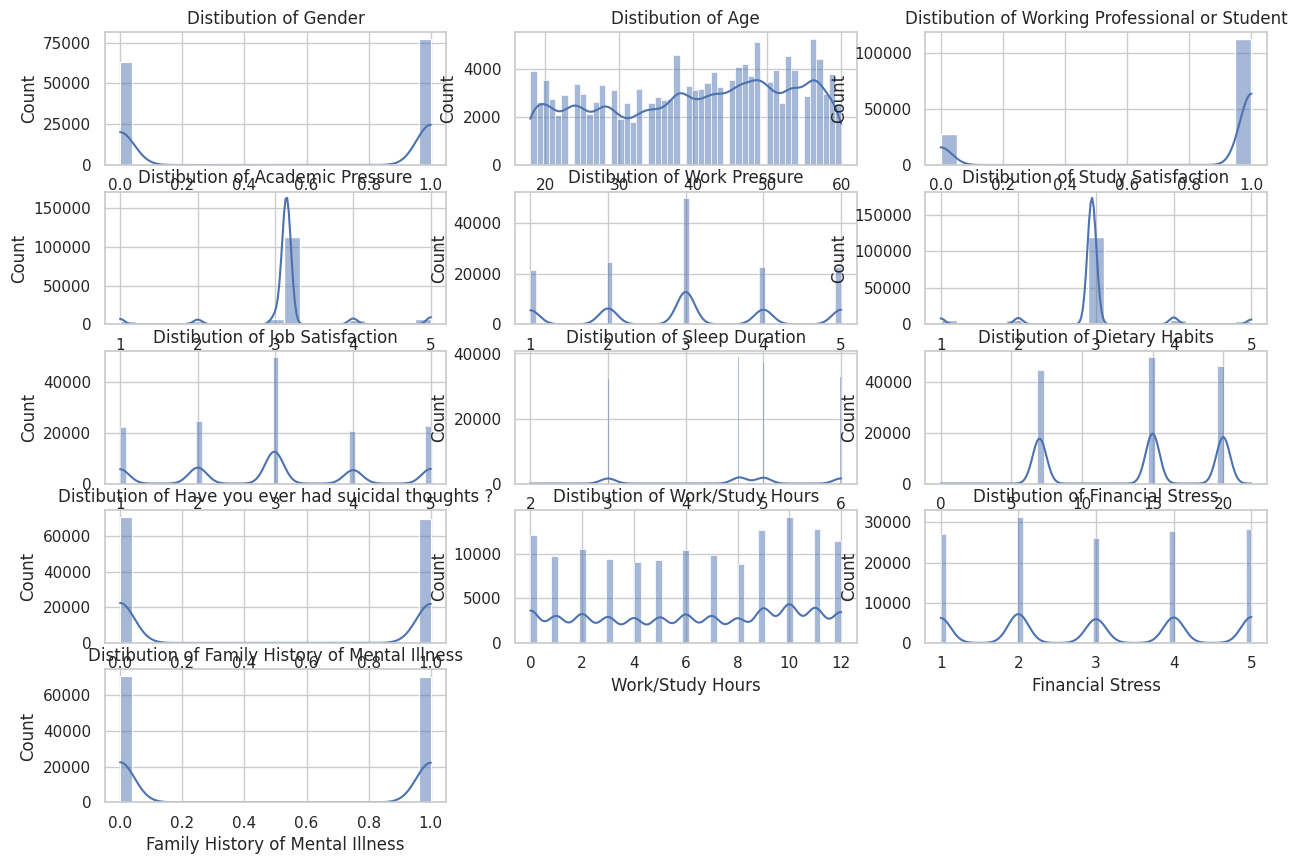

In [ ]:
# distubtion of column
plt.figure(figsize=(15,10))
for i,col in enumerate(['Gender', 'Age', 'Working Professional or Student', 'Academic Pressure',
       'Work Pressure', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],1):
  plt.subplot(5,3,i)
  sns.histplot(df[col],kde=True)
  plt.title(f"Distibution of {col}")
plt.show()


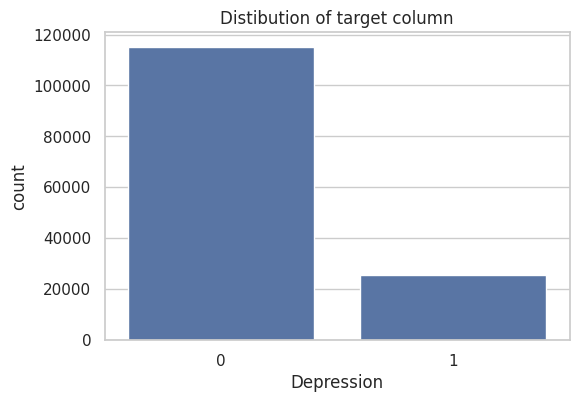

In [ ]:
# for target column
plt.figure(figsize=(6,4))
sns.countplot(x=df['Depression'])
plt.title("Distibution of target column")
plt.show()

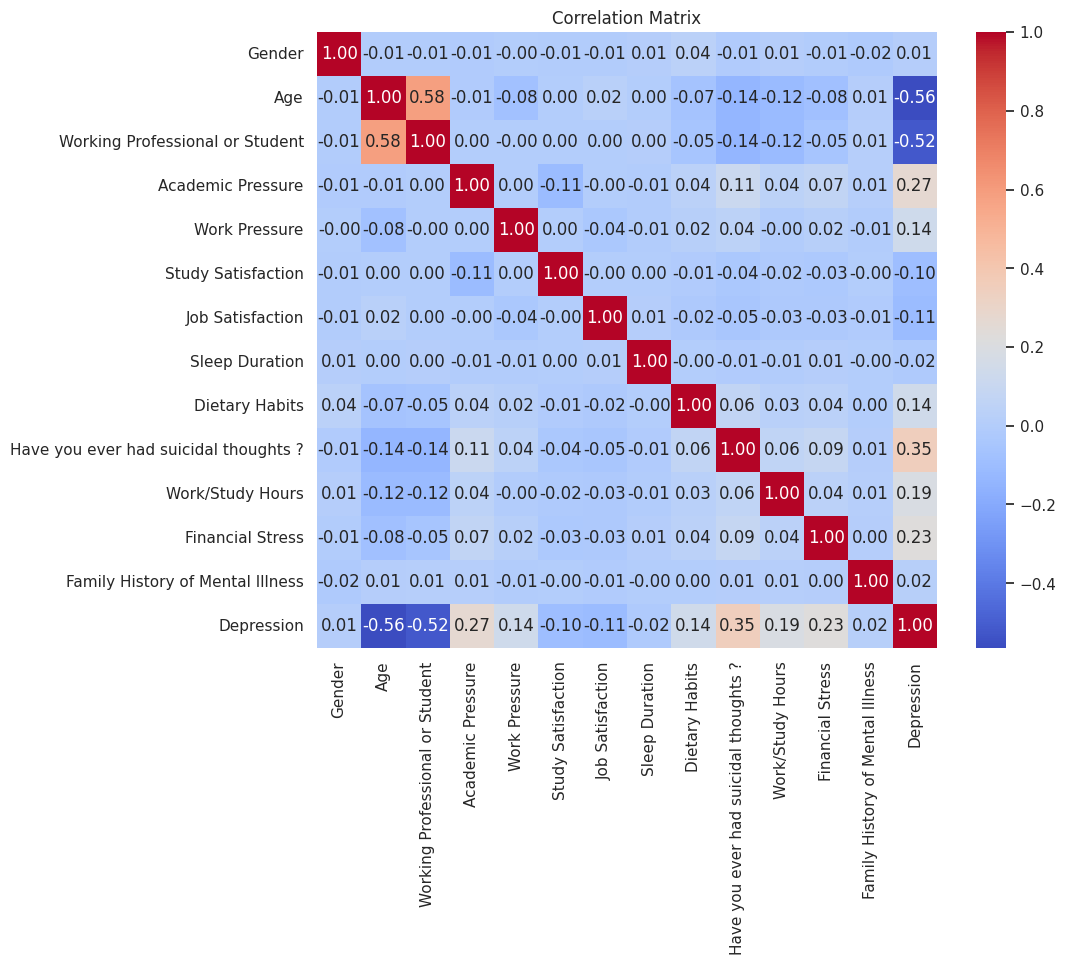

In [ ]:
# correlation matrix with numeric columns only
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])  # select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


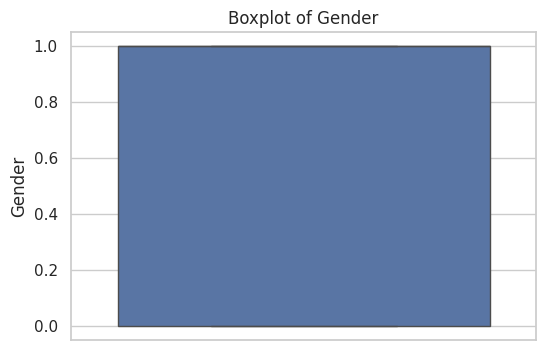

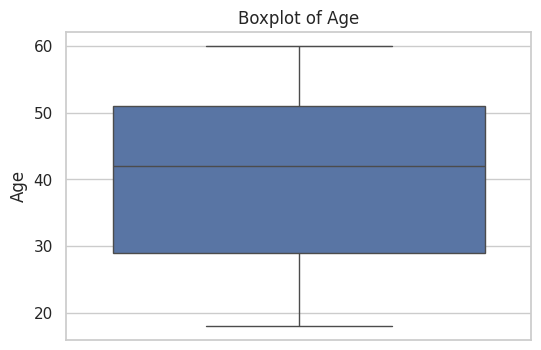

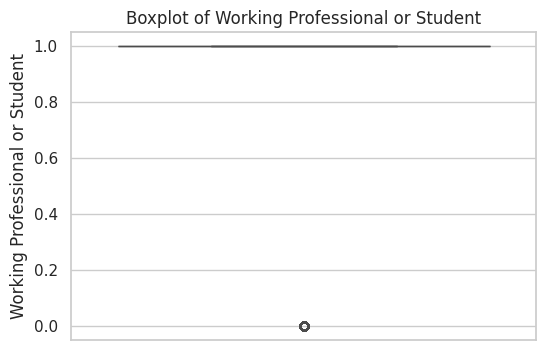

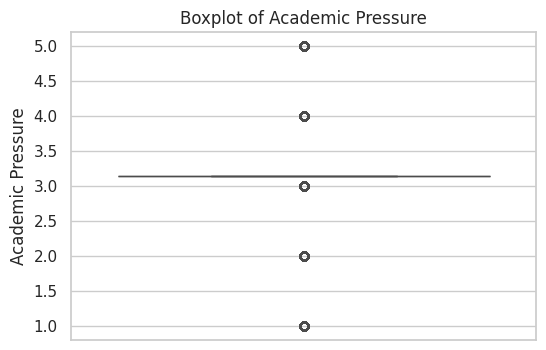

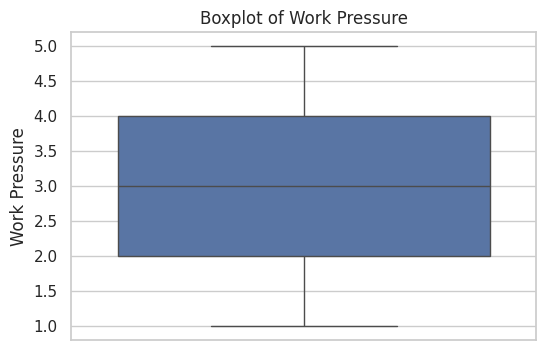

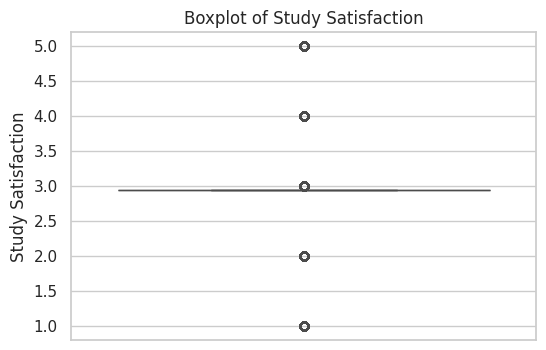

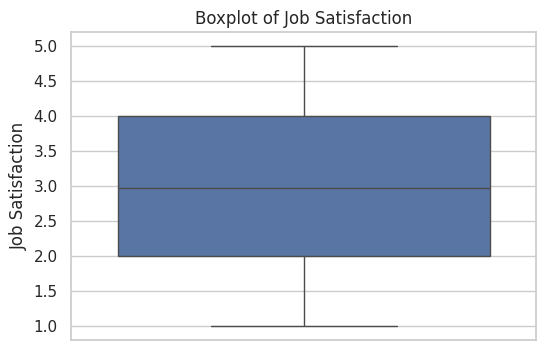

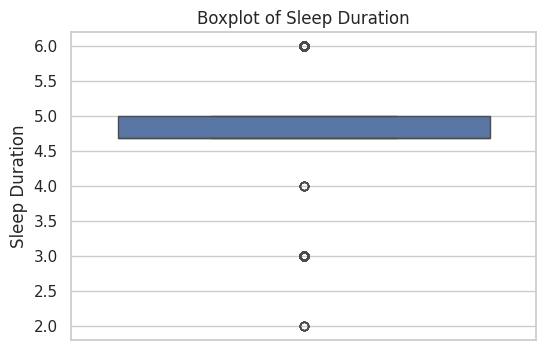

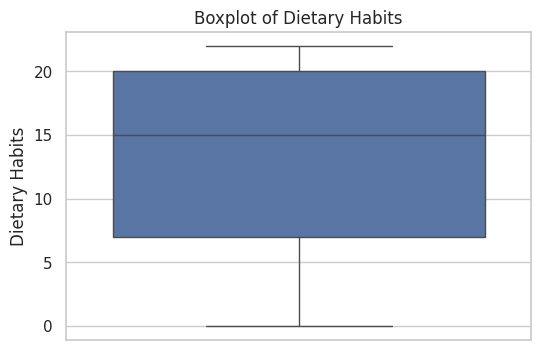

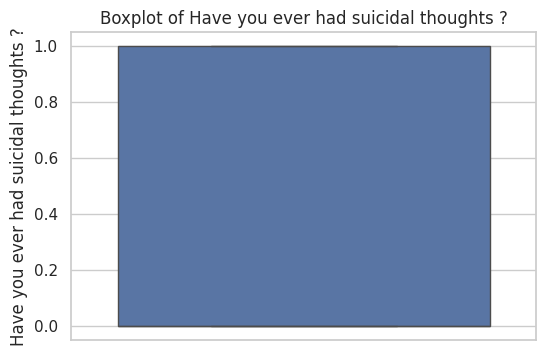

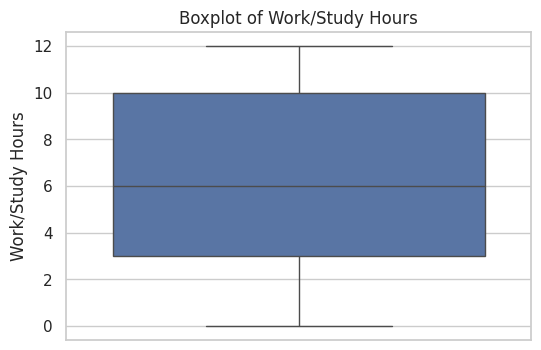

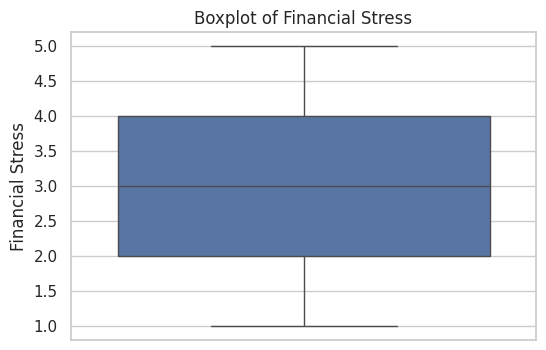

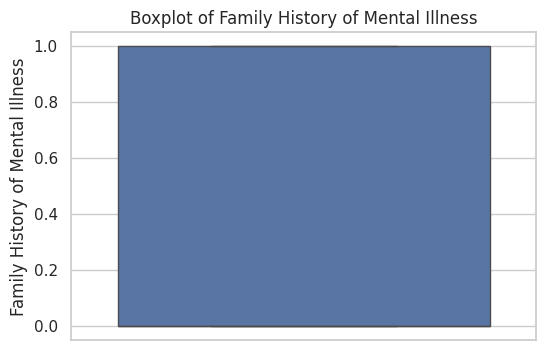

In [ ]:
#outliear detection
for i,col in enumerate(['Gender', 'Age', 'Working Professional or Student', 'Academic Pressure',
       'Work Pressure', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],1):
  plt.figure(figsize=(6,4))
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
plt.show()

start preproccesing

In [ ]:
# handle imbalancy of depreesion column
# seprate the majority and minority class
df_majority=df[df['Depression']==0]
df_minority=df[df['Depression']==1]
print(df_majority.shape)
print(df_minority.shape)
# down sample the majority class
df_majority_downsample=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)
print(df_majority_downsample.shape)
# concatnate this
df_downsample=pd.concat([df_majority_downsample,df_minority])
print(df_downsample.shape)

(115133, 14)
(25567, 14)
(25567, 14)
(51134, 14)


In [ ]:
df.head()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49.0,1,3.142273,5.000000,2.94494,2.000000,6.000000,7,0,1.0,2.0,0,0
1,1,26.0,1,3.142273,4.000000,2.94494,3.000000,4.689874,20,1,7.0,3.0,0,1
2,1,33.0,0,5.000000,2.998998,2.00000,2.974404,3.000000,7,1,3.0,1.0,0,1
3,1,22.0,1,3.142273,5.000000,2.94494,1.000000,4.689874,15,1,10.0,1.0,1,1
4,0,30.0,1,3.142273,1.000000,2.94494,1.000000,3.000000,20,1,9.0,4.0,1,0


In [ ]:
# now do shuffling so that finaL data frame to make in order
df_downsample=df_downsample.sample(frac=1,random_state=42).reset_index(drop=True)
df_downsample.head()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,50.0,1,3.142273,1.000000,2.94494,5.000000,5.0,7,0,8.0,2.0,0,0
1,0,18.0,0,3.000000,2.998998,5.00000,2.974404,3.0,20,0,5.0,3.0,1,0
2,0,51.0,1,3.142273,3.000000,2.94494,3.000000,6.0,15,0,2.0,3.0,0,0
3,0,27.0,0,4.000000,2.998998,2.00000,2.974404,6.0,15,1,10.0,1.0,1,1
4,1,59.0,1,3.142273,5.000000,2.94494,2.000000,3.0,20,0,1.0,1.0,0,0


In [ ]:
df_downsample['Depression'].value_counts()

,count
Depression,
0,25567
1,25567


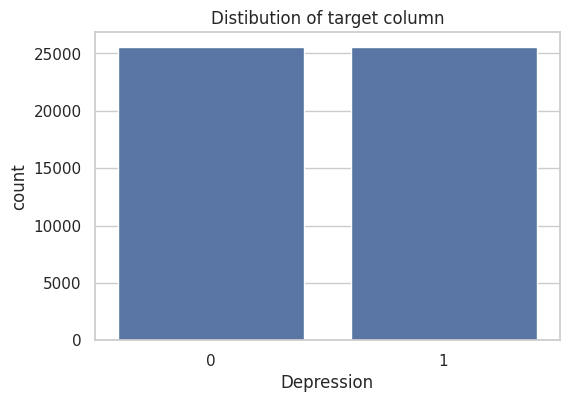

In [ ]:
# now check target column
plt.figure(figsize=(6,4))
sns.countplot(x=df_downsample['Depression'])
plt.title("Distibution of target column")
plt.show()

Train test split


In [ ]:

# sperate features and target column
x=df_downsample.drop(columns='Depression',axis=1)
y=df_downsample['Depression']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40907, 13)
(10227, 13)
(40907,)
(10227,)


Training the model

In [ ]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train on training set
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on test set
y_pred = model.predict(x_test)


Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      5111
           1       0.91      0.92      0.91      5116

    accuracy                           0.91     10227
   macro avg       0.91      0.91      0.91     10227
weighted avg       0.91      0.91      0.91     10227



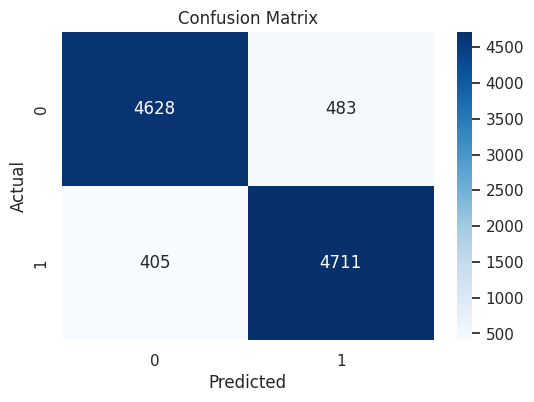

In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
df.head()

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49.0,1,3.142273,5.000000,2.94494,2.000000,6.000000,7,0,1.0,2.0,0,0
1,1,26.0,1,3.142273,4.000000,2.94494,3.000000,4.689874,20,1,7.0,3.0,0,1
2,1,33.0,0,5.000000,2.998998,2.00000,2.974404,3.000000,7,1,3.0,1.0,0,1
3,1,22.0,1,3.142273,5.000000,2.94494,1.000000,4.689874,15,1,10.0,1.0,1,1
4,0,30.0,1,3.142273,1.000000,2.94494,1.000000,3.000000,20,1,9.0,4.0,1,0


Prediction

In [ ]:
x_train.columns

Index(['Gender', 'Age', 'Working Professional or Student', 'Academic Pressure',
       'Work Pressure', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')

In [ ]:
# New user data (must be label encoded as per your dataset)
new_person = {
    'Gender': 0,  # e.g. Male
    'Age': 49	,
    'Working Professional or Student': 1,  # 0: Student
    'Academic Pressure': 3.142273	,
    'Work Pressure': 5.000000	,
    'Study Satisfaction': 2.94494	,
    'Job Satisfaction': 2.000000	,  # 0 if student
    'Sleep Duration': 6.00000,
    'Dietary Habits': 7,  # 1: Healthy
    'Have you ever had suicidal thoughts ?': 0,
    'Work/Study Hours': 1.0,
    'Financial Stress': 2.0,
    'Family History of Mental Illness': 0
}

# Convert to DataFrame
input_df = pd.DataFrame([new_person])

# Predict
prediction = model.predict(input_df)[0]
probability = model.predict_proba(input_df)[0][1]

# Result
print("Prediction:", "Depressed" if prediction == 1 else "Not Depressed")
print("Confidence of Depression:", f"{probability:.2f}")


Prediction: Not Depressed
Confidence of Depression: 0.00


In [ ]:
# save the  model
model_data={"model":model,"features_name":x.columns.tolist()}
with open('depression_model.pkl','wb') as f:
  pickle.dump(model_data,f)

In [ ]:
import pandas as pd
import pickle
# load the model from pickle
with open('/content/depression_model.pkl','rb') as f:
  model_data=pickle.load(f)
model=model_data['model']
features_name=model_data['features_name']
input_data=(0	,49.0,	1,	3.142273,	5.000000,	2.94494	,2.000000,	6.000000,	7,	0	,1.0,	2.0,	0	)
input_df=pd.DataFrame([input_data],columns=features_name)
prediction=model.predict(input_df)[0]
probability=model.predict_proba(input_df)[0][1]
print("Prediction:", "Depressed" if prediction == 1 else "Not Depressed")
print("Confidence of Depression:", f"{probability:.2f}")



Prediction: Not Depressed
Confidence of Depression: 0.00
